Packages

In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import matlab.engine

In [34]:
#load in image
I= np.asarray(Image.open('test.jpg').convert("L"), dtype=float)
pikachu = np.asarray(Image.open('pikachu.jpg').convert("RGB"),dtype=int)
van_gogh = np.asarray(Image.open('van_gogh.jpg').convert("RGB"),dtype=int)

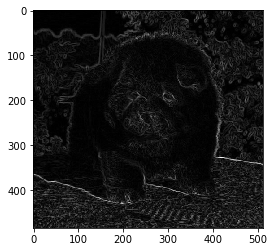

In [35]:
#Sobel Filter:
Gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
m, n = Gx.shape
edge_x_img = np.zeros_like(I)
edge_y_img = np.zeros_like(I)
edge_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 *2):
        edge_x_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gx)))
        edge_y_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gy)))
        edge_img[i+m//2, j+n//2] = np.sqrt(edge_x_img[i+m//2,j+n//2] ** 2 + edge_y_img[i+m//2,j+n//2] ** 2)

plt.imshow(edge_img, cmap="gray")

In [36]:
from skimage.exposure import cumulative_distribution
#source: https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x
def cdf(im):
    c, b = cumulative_distribution(im) 
 # pad the beginning and ending pixels and their CDF values
    c = np.insert(c, 0, [0]*b[0])
    c = np.append(c, [1]*(255-b[-1]))
    return c

def hist_matching(c, c_t, im):
    pixels = np.arange(256)
 # find closest pixel-matches corresponding to the CDF of the input image, given the value of the CDF H of   
 # the template image at the corresponding pixels, s.t. c_t = H(pixels) <=> pixels = H-1(c_t)
    new_pixels = np.interp(c, c_t, pixels) 
    im = (np.reshape(new_pixels[im.ravel()], im.shape)).astype(np.uint8)
    return im

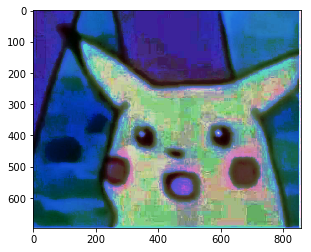

In [37]:
red_output = hist_matching(cdf(pikachu[:,:,0]),cdf(van_gogh[:,:,0]),pikachu[:,:,0])
green_output = hist_matching(cdf(pikachu[:,:,1]),cdf(van_gogh[:,:,1]),pikachu[:,:,1])
blue_output = hist_matching(cdf(pikachu[:,:,2]),cdf(van_gogh[:,:,2]),pikachu[:,:,2])
output = np.dstack((red_output,green_output,blue_output))
plt.imshow(output)